## Open Raw & Processed Files

In [11]:
import pickle

data_dir = "data"

with open(f'{data_dir}/processed.pkl', 'rb') as f:
    processed = pickle.load(f)
    processed_dfs, processed_ids = [], []
    for id, data in processed.items():
        processed_dfs.append(data)
        processed_ids.append(id)

with open(f'{data_dir}/raw.pkl', 'rb') as f:
    raw = pickle.load(f)
    raw_dfs, raw_ids = [], []
    for id, data in raw.items():
        raw_dfs.append(data)
        raw_ids.append(id)

In [12]:
class_N_test_ids = ['006', '011', '014', '015','016','017','021','022','024','031','039','043','046','047','048','054','055','059','063','064','066','068','070','075','076','081','090','095','096','097','098','102','103','105','106','112','123','124','125','127','128','129','135','138','140','140','141','142','144','148','149','154','158','159','163','164','166','178','179','184','189','194','196','198'] # noir pur
class_B_test_ids = ['012', '018', '019', '020','023','036','040','042','049','053','083','091','121','133','134','146','151','155','172','177','192']  # blanc pur

processed_labels = []
for id in processed_ids:
    if id in class_N_test_ids:
        processed_labels.append('black')
    elif id in class_B_test_ids:
        processed_labels.append('white')
    else:
        processed_labels.append('unknown')

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def get_processed_features(df_list, scaler=None):
    features_list = []
    for dataframe in df_list:
        df = dataframe.copy()
        if df.shape[0] < 1000:
            pass
        else:
            df = df.iloc[:, 1:-11]
            df = df[df[df.columns[5]] >= 0]
            df = df.drop(columns=[df.columns[3]])
            col_name = df.columns[4]
            col = df.pop(col_name)
            df.insert(0, col_name, col)
            df = df.drop_duplicates(keep=False)
            columns = df.columns.tolist()
            df = scaler.fit_transform(df) if scaler is not None else df
            features_list.append(pd.DataFrame(df, columns=columns))
    return features_list

def get_raw_features(df_list, scaler=None):
    features_list = []
    for dataframe in df_list:
        df = dataframe.copy()
        if df.shape[0] < 1000:
            pass
        else:
            df = df.iloc[:, 1:-6]
            df = df[df[df.columns[0]] >= 0]
            df = df.drop_duplicates(keep=False)
            columns = df.columns.tolist()
            df = scaler.fit_transform(df) if scaler is not None else df
            features_list.append(pd.DataFrame(df, columns=columns))
    return features_list

processed_feature_dfs = get_processed_features(processed_dfs, scaler)
raw_feature_dfs = get_raw_features(raw_dfs, scaler)

In [4]:
processed_feature_dfs[0]

,Déplacement corrigé dérive thermique (nm),Force (mN),Raideur brute (N/m),P/S² (nm),Amortissement brut,Raideur de contact (N/m),hr (nm),ErL(MPa),HL (MPa),EL (MPa),hcOP (nm),ErOP(MPa),HOP (MPa),EOP (MPa),ErsL(MPa),ErsOP(MPa),tan delta
0,-0.767390,-0.509791,-0.797117,-0.765625,-0.133560,-0.771837,-0.757754,-3.682562,-2.743755,-3.410421,-0.760299,-3.701397,-2.771577,-3.376364,-1.104040,-1.083930,30.892004
1,-0.766196,-0.509789,-0.797034,-0.764439,13.293877,-0.771761,-0.759960,-3.675731,-2.736061,-3.404875,-0.761609,-3.694607,-2.763720,-3.371068,-1.019958,-1.015548,16.486952
2,-0.765654,-0.509782,-0.796944,-0.763902,22.763410,-0.771679,-0.764957,-3.666529,-2.706667,-3.397399,-0.765146,-3.685979,-2.735874,-3.364333,-0.849388,-0.880328,11.314964
3,-0.765301,-0.509776,-0.796847,-0.763551,21.311058,-0.771591,-0.767172,-3.656560,-2.671828,-3.389296,-0.766684,-3.676692,-2.704435,-3.357080,-0.710110,-0.765012,8.704619
4,-0.764136,-0.509773,-0.796725,-0.762394,13.744662,-0.771480,-0.764368,-3.647965,-2.669500,-3.382305,-0.764312,-3.667956,-2.700737,-3.350253,-0.695179,-0.736075,6.927743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,3.257966,4.289231,3.254741,3.266807,-0.093024,3.396164,3.283160,1.031629,0.093882,1.072669,3.276541,1.055922,0.121006,1.107890,0.188418,0.196027,-0.093339
1601,3.269177,4.318115,3.280729,3.278157,-0.093364,3.426369,3.295543,1.051511,0.093781,1.094834,3.288614,1.076328,0.121317,1.131160,-0.080787,-0.073958,-0.105771
1602,3.281577,4.346998,3.306920,3.290688,-0.093705,3.456860,3.309217,1.070104,0.091854,1.115591,3.301952,1.095464,0.119798,1.153019,-0.237504,-0.231080,-0.113082
1603,3.294698,4.375881,3.330750,3.303933,-0.093990,3.484646,3.323481,1.084859,0.089080,1.132083,3.315915,1.110684,0.117363,1.170432,-0.281543,-0.275154,-0.115286


In [5]:
min([df.shape[0] for df in processed_feature_dfs])

1601

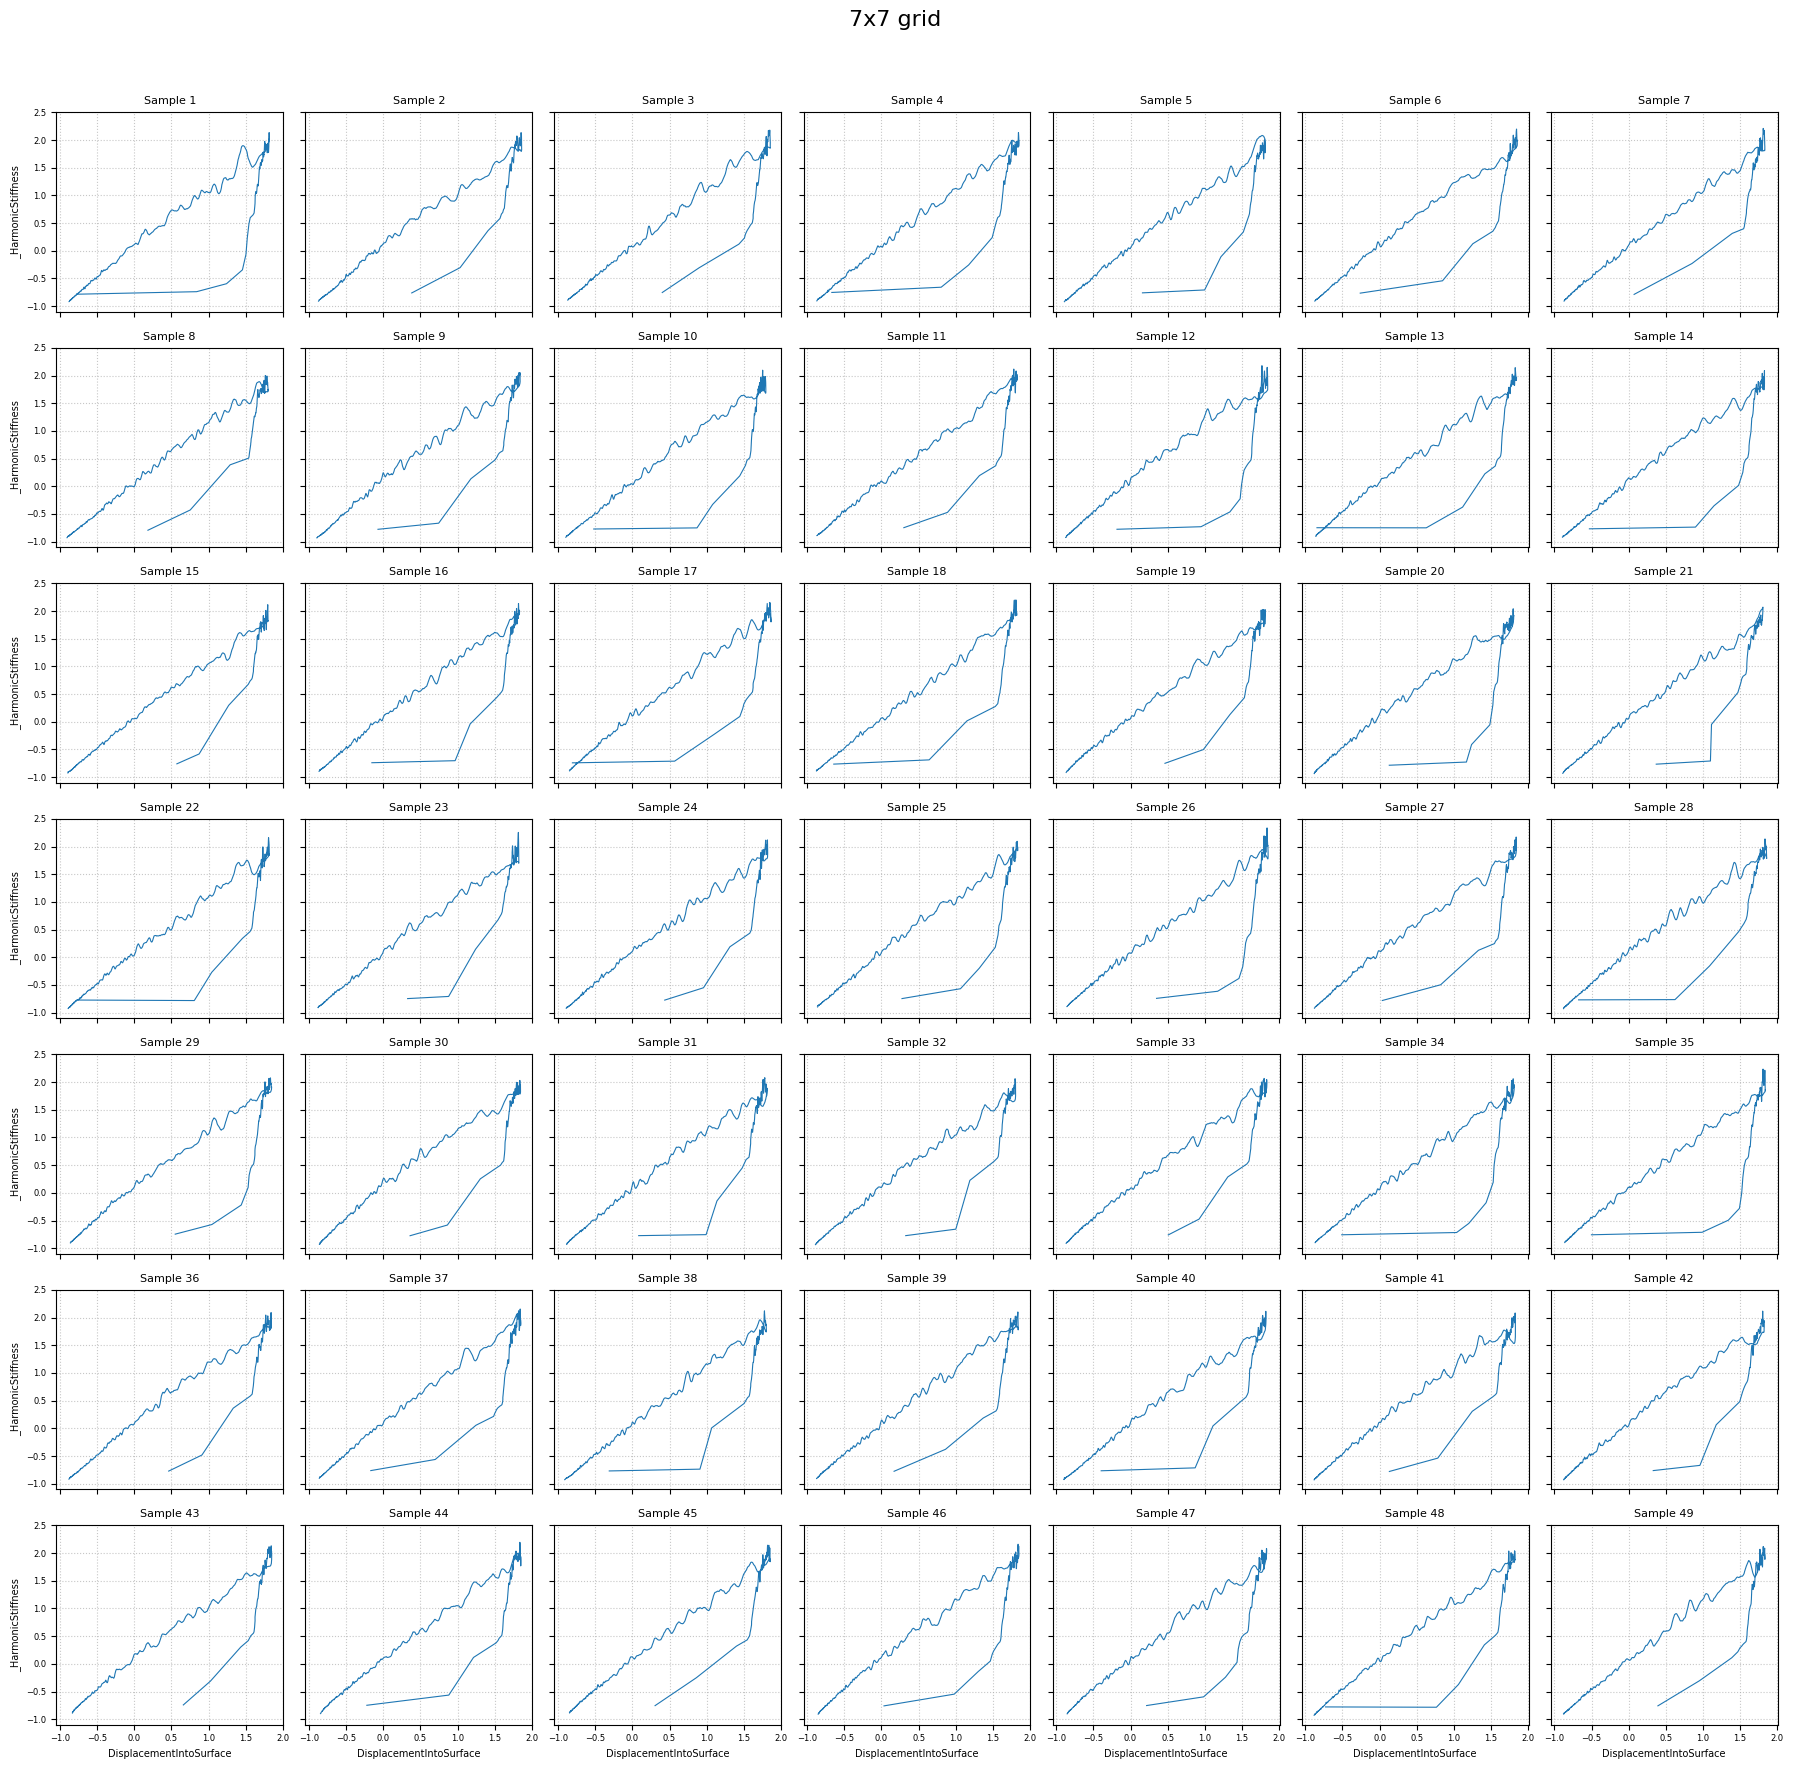

In [6]:
import matplotlib.pyplot as plt

RAW_DISPLACEMENT_COL = 'DisplacementIntoSurface'
RAW_LOAD_COL = '_HarmonicStiffness' 

grid_size = (7, 7)
num_plots = grid_size[0] * grid_size[1]

fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle(f'{grid_size[0]}x{grid_size[1]} grid', fontsize=16)
axes_flat = axes.flatten()

for i in range(min(len(raw_feature_dfs), num_plots)):
    df = raw_feature_dfs[i]
    ax = axes_flat[i]
        
    ax.plot(df[RAW_DISPLACEMENT_COL], df[RAW_LOAD_COL], linewidth=0.8)
    ax.set_title(f'Sample {i+1}', fontsize=8)
    ax.xaxis.set_tick_params(labelsize=6)
    ax.yaxis.set_tick_params(labelsize=6)

    if i // grid_size[1] == grid_size[0] - 1: 
        ax.set_xlabel(RAW_DISPLACEMENT_COL, fontsize=7)
    if i % grid_size[1] == 0: 
        ax.set_ylabel(RAW_LOAD_COL, fontsize=7)
    ax.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [7]:
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
import numpy as np

def extract_features_from_curve(df):
    features = {}
    
    h = df['Déplacement corrigé dérive thermique (nm)'].values
    H = df['HOP (MPa)'].values

    valid = h >= 0
    h = h[valid]
    H = H[valid]

    # Corriger les problèmes de gradient (h doit être strictement croissant)
    sorted_indices = np.argsort(h)
    h = h[sorted_indices]
    H = H[sorted_indices]

    _, unique_indices = np.unique(h, return_index=True)
    h = h[unique_indices]
    H = H[unique_indices]

    if len(H) == 0:
        return {}

    features.update({
        'max_HOP': np.max(H),
        'min_HOP': np.min(H),
        'mean_HOP': np.mean(H),
        'std_HOP': np.std(H),
        'range_HOP': np.ptp(H),
        'skew_HOP': skew(H),
        'kurtosis_HOP': kurtosis(H)
    })

    dH_dh = np.gradient(H, h)
    d2H_dh2 = np.gradient(dH_dh, h)

    features.update({
        'max_abs_dH_dh': np.max(np.abs(dH_dh)),
        'mean_dH_dh': np.mean(dH_dh),
        'std_dH_dh': np.std(dH_dh),
        'max_abs_d2H_dh2': np.max(np.abs(d2H_dh2)),
        'n_peaks_dH_dh': len(find_peaks(np.abs(dH_dh))[0]),
        'n_peaks_d2H_dh2': len(find_peaks(np.abs(d2H_dh2))[0])
    })

    segment_edges = [0, 200, 500, 800, np.inf]
    for i in range(len(segment_edges) - 1):
        mask = (h >= segment_edges[i]) & (h < segment_edges[i+1])
        if np.any(mask):
            segment = H[mask]
            features.update({
                f'segment_{i}_mean_HOP': np.mean(segment),
                f'segment_{i}_std_HOP': np.std(segment),
                f'segment_{i}_max_HOP': np.max(segment),
                f'segment_{i}_min_HOP': np.min(segment),
            })

    initial_mask = h <= 50
    if np.sum(initial_mask) > 2:
        poly = np.polyfit(h[initial_mask], H[initial_mask], 1)
        features['initial_stiffness'] = poly[0]
    else:
        features['initial_stiffness'] = np.nan

    return features

features_list = []
for df in processed_feature_dfs:
    feats = extract_features_from_curve(df)
    features_list.append(feats)

df_features = pd.DataFrame(features_list)

In [8]:
import json
import numpy as np
from dataset import TimeSeriesDataset
from ts2vec import TS2Vec

seq_length = 1600

ts_dataset = TimeSeriesDataset(pkl_path="data/processed.pkl", mode="processed", seq_length=seq_length)
nb_features = ts_dataset.dfs[0].shape[1]
test_data = np.array([df.values for df in ts_dataset.dfs], dtype=np.float32)

with open("checkpoints/hyperparameters.json", "r") as f:
    config = json.load(f)

model = TS2Vec(**config)
model.load("checkpoints/ts2vec_model.pt")
ts2vec_emb = model.encode(test_data, encoding_window='full_series')

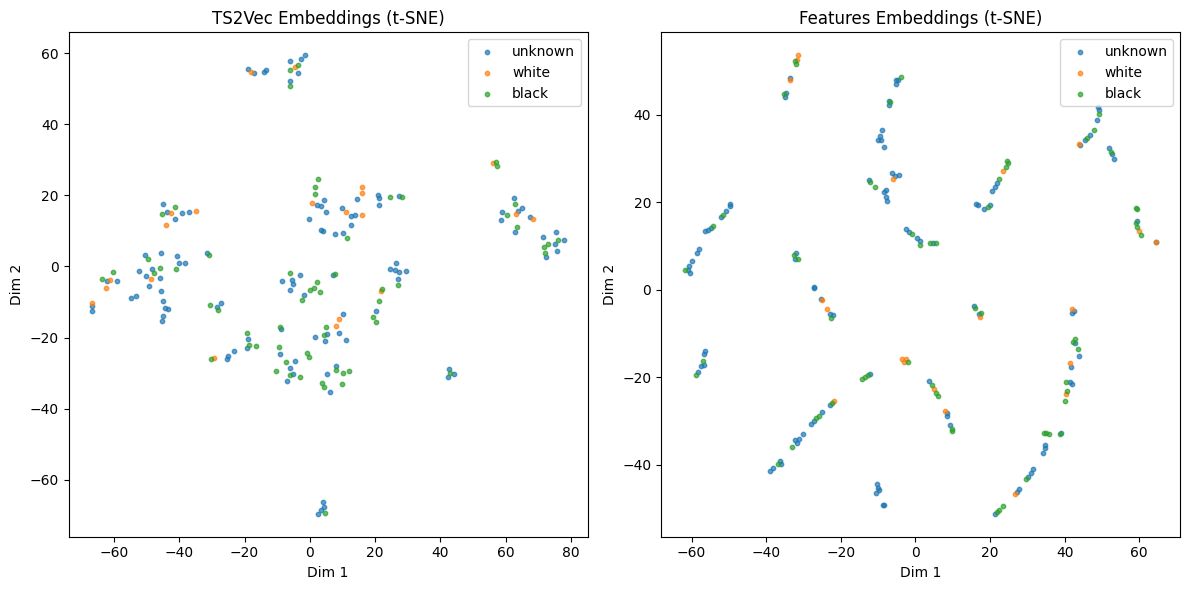

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X_ts2vec_tsne = TSNE(
    n_components=2, learning_rate='auto', init='random', perplexity=3
).fit_transform(ts2vec_emb)

X_features_tsne = TSNE(
    n_components=2, learning_rate='auto', init='random', perplexity=3
).fit_transform(df_features.values)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
unique_labels = set(processed_labels)

for label in unique_labels:
    idxs = [i for i, l in enumerate(processed_labels) if l == label]
    axes[0].scatter(X_ts2vec_tsne[idxs, 0],  X_ts2vec_tsne[idxs, 1], label=label, s=10, alpha=0.7)
axes[0].set_title("TS2Vec Embeddings (t-SNE)")
axes[0].legend()
axes[0].set_xlabel("Dim 1")
axes[0].set_ylabel("Dim 2")

for label in unique_labels:
    idxs = [i for i, l in enumerate(processed_labels) if l == label]
    axes[1].scatter(X_features_tsne[idxs, 0], X_features_tsne[idxs, 1], label=label, s=10, alpha=0.7)
axes[1].set_title("Features Embeddings (t-SNE)")
axes[1].legend()
axes[1].set_xlabel("Dim 1")
axes[1].set_ylabel("Dim 2")

plt.tight_layout()
plt.show()


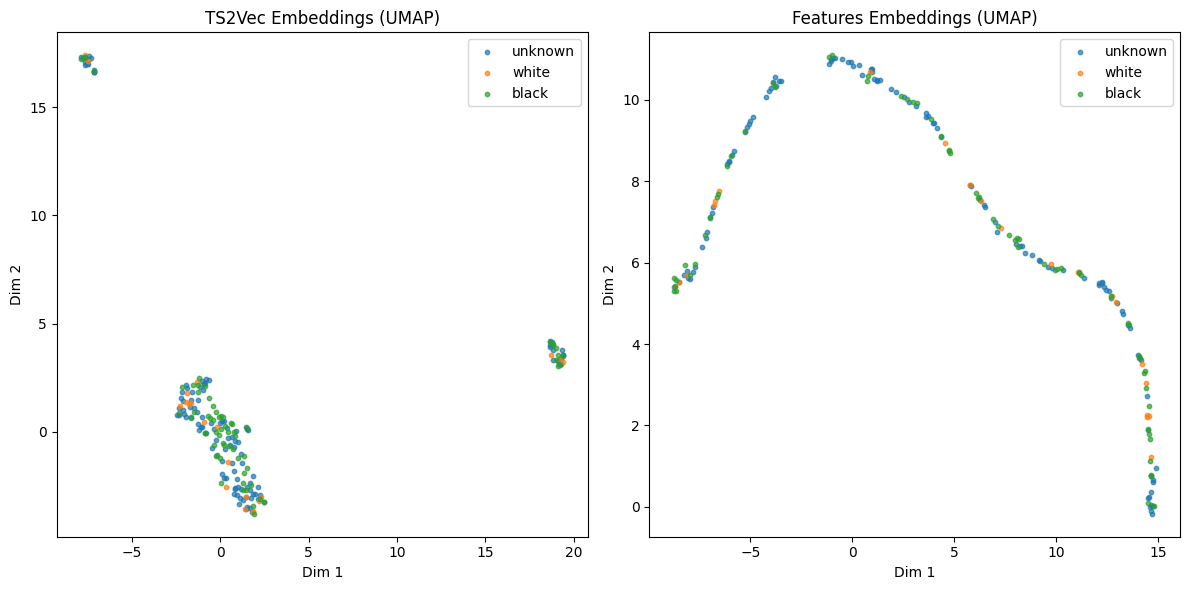

In [27]:
import matplotlib.pyplot as plt
import umap

X_ts2vec_umap = umap.UMAP(n_components=2).fit_transform(ts2vec_emb)
X_features_umap = umap.UMAP(n_components=2).fit_transform(df_features.values)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

unique_labels = set(processed_labels)

for label in unique_labels:
    idxs = [i for i, l in enumerate(processed_labels) if l == label]
    axes[0].scatter(X_ts2vec_umap[idxs, 0],  X_ts2vec_umap[idxs, 1], label=label, s=10, alpha=0.7)
axes[0].set_title("TS2Vec Embeddings (UMAP)")
axes[0].legend()
axes[0].set_xlabel("Dim 1")
axes[0].set_ylabel("Dim 2")

for label in unique_labels:
    idxs = [i for i, l in enumerate(processed_labels) if l == label]
    axes[1].scatter(X_features_umap[idxs, 0], X_features_umap[idxs, 1], label=label, s=10, alpha=0.7)
axes[1].set_title("Features Embeddings (UMAP)")
axes[1].legend()
axes[1].set_xlabel("Dim 1")
axes[1].set_ylabel("Dim 2")

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

ts2vec_umap_3d = umap.UMAP(n_components=3).fit_transform(ts2vec_emb)

fig = px.scatter_3d(
    x=ts2vec_umap_3d[:, 0],
    y=ts2vec_umap_3d[:, 1],
    z=ts2vec_umap_3d[:, 2],
    opacity=0.7,
    size_max=5
)

fig.update_traces(marker=dict(size=3))  # smaller points for dense embeddings
fig.update_layout(
    title="UMAP 3D projection (interactive)",
    scene=dict(
        xaxis_title="Dim 1",
        yaxis_title="Dim 2",
        zaxis_title="Dim 3"
    )
)

fig.show()